###### Import packages and csv tables

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('expedia_data_clean.csv', index_col=0)
df_bp = pd.read_pickle("Booking_price_comparison.pkl")
df_air = pd.read_pickle("2017_airbnb_api_data_clean.pkl")

In [3]:
#Transformatin of df. area
df = df.replace("Hessenwinkel", "Treptow-Köpenick")
#rename columns
df.columns=["name", "area", "price"]
df_bp.columns = ["name", "price", "street", "area", "zip"]
df.head(2)

,name,area,price
0,2A Hostel,Neukölln,58.0
1,364.berlin,Berlin,84.0


In [4]:
df_bp.head(2)

,name,price,street,area,zip
0,City Hotel am Gendarmenmarkt,107,Leipziger Str. 65,Mitte,"10117 Berlin, Germany"
4,mk hotel berlin,91,Osloer Straße 100,Mitte,"13359 Berlin, Germany"


In [5]:
df_air.head(2)

,name,price,area,source
0,10103806,40,Neukölln,airbnb
1,16187267,40,Neukölln,airbnb


In [6]:
# to measure the density of hotels per area, we only need the hotel and the area columns
df_bp = df_bp.drop([ "street", "zip"], axis=1)

##### Merge all the tables 

In [7]:
merged = df.append(df_bp, ignore_index=True, sort=True)

In [8]:
#Create Column that indicates source
merged["source"] = "hotel"
merged.head(2)

,area,name,price,source
0,Neukölln,2A Hostel,58,hotel
1,Berlin,364.berlin,84,hotel


In [9]:
merged.head(2)

,area,name,price,source
0,Neukölln,2A Hostel,58,hotel
1,Berlin,364.berlin,84,hotel


In [10]:
merged_all = merged.append(df_air, ignore_index=True, sort = True)

In [11]:
merged_all.head(2)

,area,name,price,source
0,Neukölln,2A Hostel,58,hotel
1,Berlin,364.berlin,84,hotel


##### Transformations

In [12]:
merged_all.area.unique()

array(['Neukölln', 'Berlin', 'Pankow', 'Mitte',
       'Charlottenburg-Wilmersdorf', 'Lichtenberg', 'Spandau',
       'Schmöckwitzwerder', 'Treptow-Köpenick', 'Dahlwitz-Hoppegarten',
       'Neueiche', ' Berlin', ' Mitte', ' Charlottenburg-Wilmersdorf',
       ' Friedrichshain-Kreuzberg', ' Tempelhof-Schöneberg',
       ' Reinickendorf', ' Lichtenberg', ' Prenzlauer Berg', ' Neukölln',
       ' Treptow-Köpenick', ' Steglitz-Zehlendorf', ' 80-82', ' Spandau',
       ' Pankow', ' Marzahn-Hellersdorf', ' 10787 Berlin',
       'Friedrichshain-Kreuzberg', 'Charlottenburg-Wilm.',
       'Marzahn - Hellersdorf', 'Reinickendorf', 'Steglitz - Zehlendorf',
       'Tempelhof - Schöneberg', 'Treptow - Köpenick'], dtype=object)

In [13]:
# get rid of the € signs in price
#merged_data_full.price.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [14]:
#we have 24 duplicates
merged_all["name"].value_counts()

Holiday Inn Berlin City Center East Prenzlauer Berg    4
SO/ Berlin Das Stue                                    4
Good Morning + Berlin City East                        4
MEININGER Hotel Berlin East Side Gallery               4
Erlanger Hof                                           4
                                                      ..
4232799                                                1
13978500                                               1
9226389                                                1
16519301                                               1
5865532                                                1
Name: name, Length: 10411, dtype: int64

In [15]:
#drop duplicates
merged_all["name"] = merged_all["name"].drop_duplicates()

In [16]:
merged_all["name"].value_counts()

1694698     1
15979394    1
7232901     1
18006842    1
15830485    1
           ..
15835727    1
18350730    1
9257996     1
17492209    1
5865532     1
Name: name, Length: 10411, dtype: int64

##### Inspect Data Types

In [17]:
merged_all.dtypes

area      object
name      object
price     object
source    object
dtype: object

In [18]:
merged_all.area.unique()

array(['Neukölln', 'Berlin', 'Pankow', 'Mitte',
       'Charlottenburg-Wilmersdorf', 'Lichtenberg', 'Spandau',
       'Schmöckwitzwerder', 'Treptow-Köpenick', 'Dahlwitz-Hoppegarten',
       'Neueiche', ' Berlin', ' Mitte', ' Charlottenburg-Wilmersdorf',
       ' Friedrichshain-Kreuzberg', ' Tempelhof-Schöneberg',
       ' Reinickendorf', ' Lichtenberg', ' Prenzlauer Berg', ' Neukölln',
       ' Treptow-Köpenick', ' Steglitz-Zehlendorf', ' 80-82', ' Spandau',
       ' Pankow', ' Marzahn-Hellersdorf', ' 10787 Berlin',
       'Friedrichshain-Kreuzberg', 'Charlottenburg-Wilm.',
       'Marzahn - Hellersdorf', 'Reinickendorf', 'Steglitz - Zehlendorf',
       'Tempelhof - Schöneberg', 'Treptow - Köpenick'], dtype=object)

In [19]:
#remove spacing in the fromt of area name
merged_all.area = merged_all.area.str.lstrip()

In [20]:
#remove weird area data and rename area Berlin to unknown
merged_all.area = merged_all.area.replace("Berlin", "unknown")
merged_all.area = merged_all.area.replace("80-82", "unknown")
merged_all.area = merged_all.area.replace("10787 Berlin", "Tempelhof-Schöneberg")
merged_all.area = merged_all.area.replace("Charlottenburg-Wilm.", "Charlottenburg-Wilmersdorf")
merged_all.area = merged_all.area.replace("Marzahn - Hellersdorf", "Marzahn-Hellersdorf")
merged_all.area = merged_all.area.replace("Steglitz - Zehlendorf", "Steglitz-Zehlendorf")
merged_all.area = merged_all.area.replace("Tempelhof - Schöneberg", "Tempelhof-Schöneberg")
merged_all.area = merged_all.area.replace("Treptow - Köpenick", "Treptow-Köpenick")
merged_all.area = merged_all.area.replace("Prenzlauer Berg", "Pankow")

In [21]:
merged_all.area.unique()

array(['Neukölln', 'unknown', 'Pankow', 'Mitte',
       'Charlottenburg-Wilmersdorf', 'Lichtenberg', 'Spandau',
       'Schmöckwitzwerder', 'Treptow-Köpenick', 'Dahlwitz-Hoppegarten',
       'Neueiche', 'Friedrichshain-Kreuzberg', 'Tempelhof-Schöneberg',
       'Reinickendorf', 'Steglitz-Zehlendorf', 'Marzahn-Hellersdorf'],
      dtype=object)

In [22]:
# save price as int
merged_all["price"] = merged_all["price"].astype("float")

In [23]:
merged_all.dtypes

area       object
name       object
price     float64
source     object
dtype: object

In [24]:
merged_all.head(2)

,area,name,price,source
0,Neukölln,2A Hostel,58.0,hotel
1,unknown,364.berlin,84.0,hotel


##### Descriptive Statistics

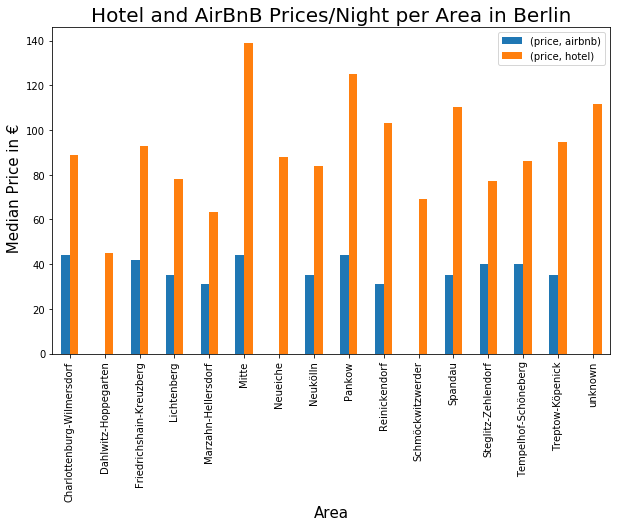

In [25]:
# Price comparison between hotels and air bnb
price_chart = merged_all.groupby(["area", "source"]).median().unstack().plot(figsize=(10,6),kind="bar");
price_chart;
plt.legend();
plt.xlabel("Area", size = 15);
plt.ylabel(" Median Price in €", size = 15);
plt.title("Hotel and AirBnB Prices/Night per Area in Berlin", size = 20);
plt.xticks(rotation=90);

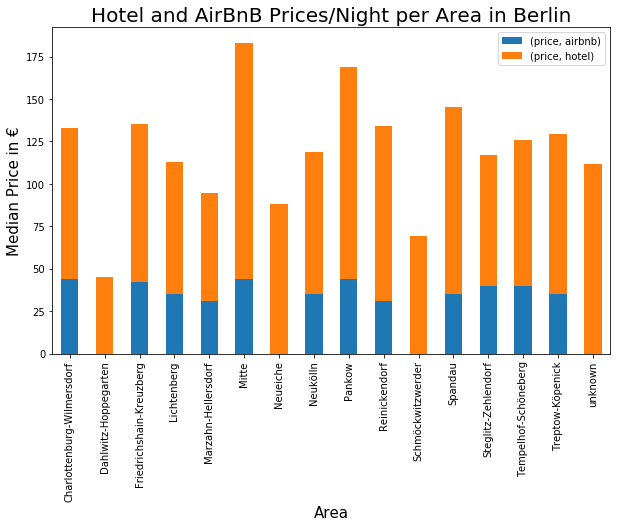

In [26]:
# here we can clearly see the difference in price
merged_all.groupby(["area", "source"]).median().unstack().plot.bar(figsize=(10,6),stacked=True)
plt.legend();
plt.xlabel("Area", size = 15);
plt.ylabel("Median Price in €", size = 15);
plt.title("Hotel and AirBnB Prices/Night per Area in Berlin", size = 20);
plt.xticks(rotation=90);

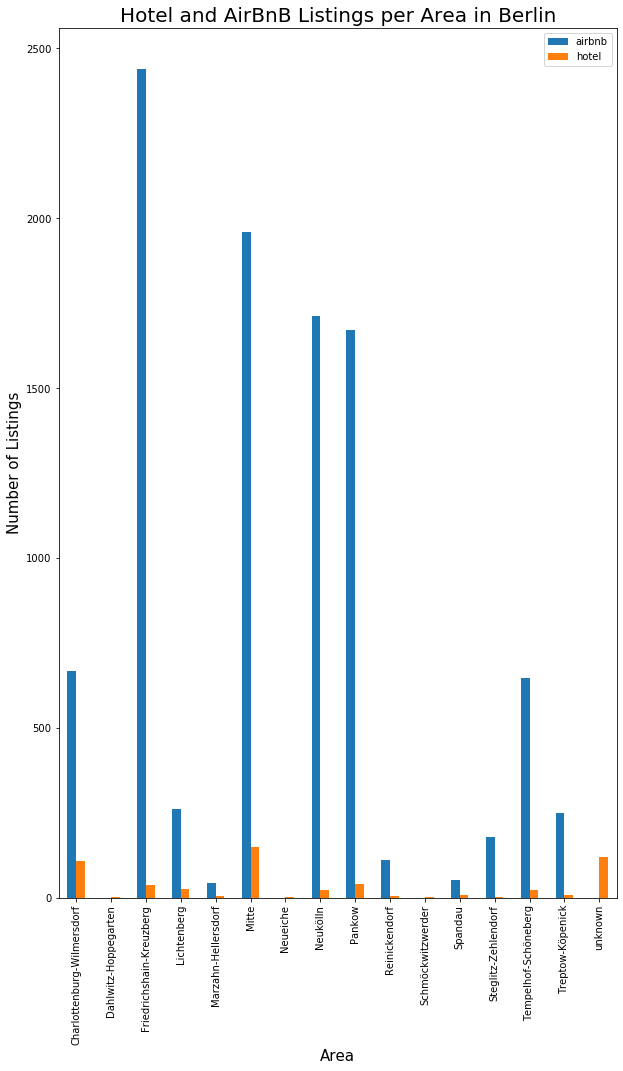

In [27]:
# density comparison between hotels and air bnb
density_chart = merged_all.sort_values(["area", "source"]).reset_index(drop=True).groupby(["area", "source"]).size().unstack().plot(figsize=(10,16),kind="bar");
density_chart;
plt.legend();
plt.xlabel("Area", size = 15);
plt.ylabel("Number of Listings", size = 15);
plt.title("Hotel and AirBnB Listings per Area in Berlin", size = 20);
plt.xticks(rotation=90);